In [2]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(readr)
library(splancs)
library(maps)
library(MASS)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: sp


Spatial Point Pattern Analysis Code in S-Plus
 
 Version 2 - Spatial and Space-Time analysis



Attaching package: ‘splancs’


The following object is masked from ‘package:tidyr’:

    tribble


The following object is masked from ‘package:dplyr’:

    tribble



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




In [32]:
PPP <- read_csv('./PPP_with_FIPS.csv')

Rows: 1236696 Columns: 40
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (28): DateApproved, BorrowerName, BorrowerAddress, BorrowerCity, Borrowe...
dbl (12): LoanNumber, SBAOfficeCode, Term, SBAGuarantyPercentage, InitialApp...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [30]:
system('R CMD SHLIB ./C_files/kde.c')

dyn.load('./C_files/kde.so')

kde <- function(x,m){

    x <- as.double(x)

    m <- as.integer(m)

    g <- as.double(seq(min(x),max(x),length.out = m))

    n <- as.integer(length(x))

    bw <- as.double(1.06 * min(sd(x),IQR(x)) * n^(-1/5))

    y <- double(m)

    a <- .C('KDE',n=n,m=m,x=x,g=g,y=y,bw=bw)

    return(a$y)

}

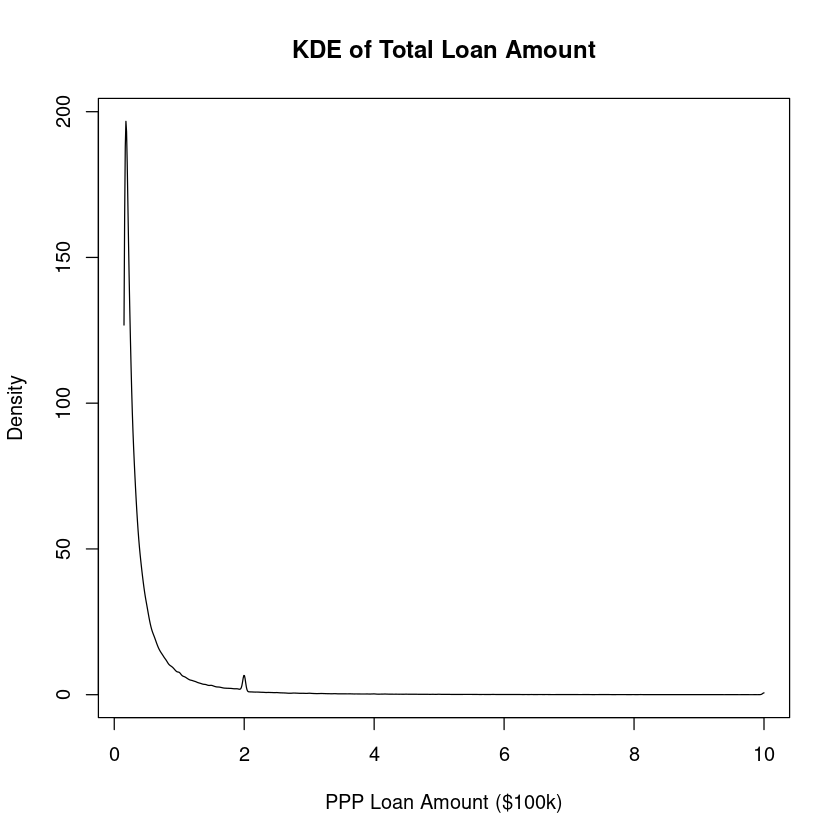

In [38]:
total <- PPP$CurrentApprovalAmount / 1e6
m <- 1000

est1 <- kde(total, m)

plot(seq(min(total),max(total),length.out = m), est1,
    type = 'l',
    xlab = 'PPP Loan Amount ($100k)',
    ylab = 'Density')
title("KDE of Total Loan Amount")

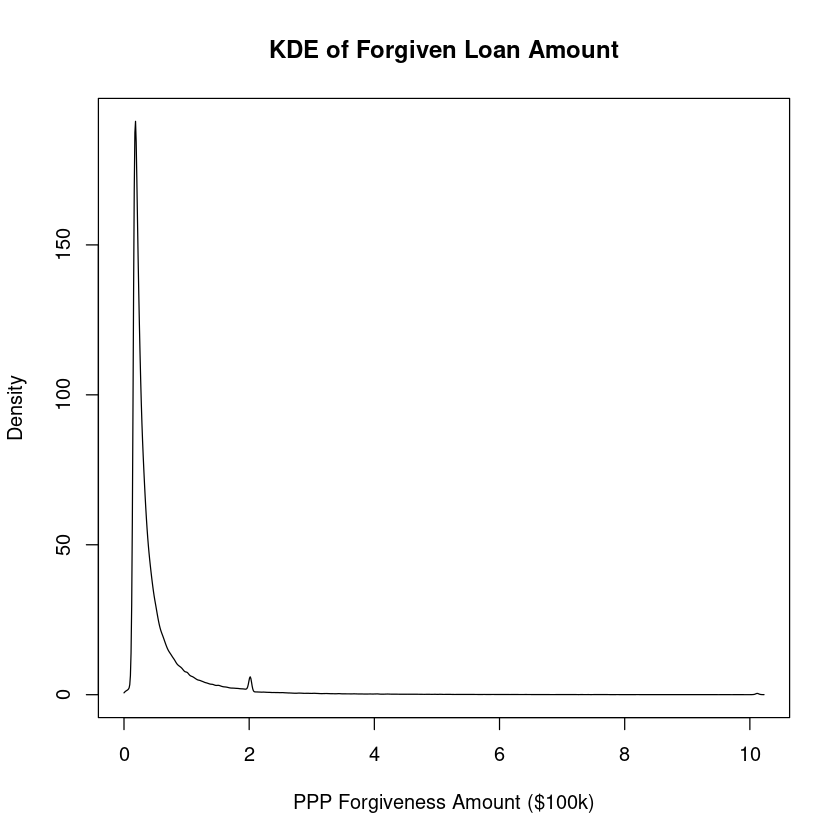

In [39]:
forgive <- PPP[!is.na(PPP$ForgivenessAmount),'ForgivenessAmount'] %>% pull() / 1e6

m <- 1000

est2 <- kde(forgive, m)

plot(seq(min(forgive),max(forgive),length.out = m), est2,
    type = 'l',
    xlab = 'PPP Forgiveness Amount ($100k)',
    ylab = 'Density')
title("KDE of Forgiven Loan Amount")

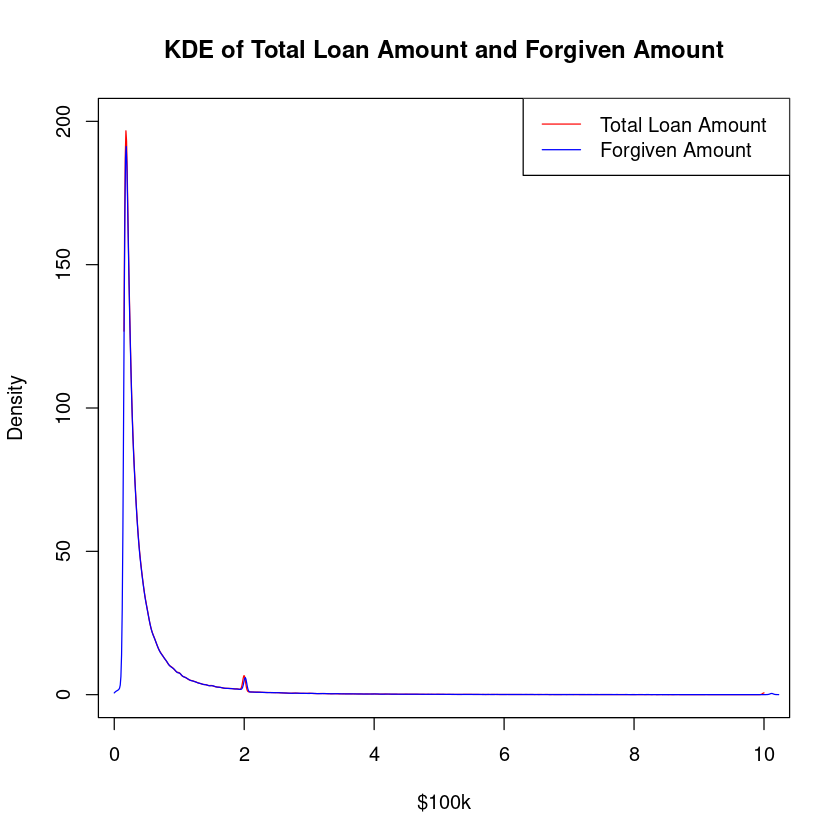

In [41]:
plot(c(min(total),max(total)), c(0,200),
type = 'n',
xlab = '$100k',
ylab = 'Density')
lines(seq(min(total),max(total),length.out = m), est1,
col = 'red')
lines(seq(min(forgive),max(forgive),length.out = m), est2,
col = 'blue')
title('KDE of Total Loan Amount and Forgiven Amount')
legend("topright",legend = c("Total Loan Amount",'Forgiven Amount'),
col = c('red','blue'),
lty = c(1,1))

In [20]:
system("R CMD SHLIB ./C_files/tetrachoric.c")

dyn.load("./C_files/tetrachoric.so")

t_corr <- function(x,y){

    x <- as.integer(x)
    y <- as.integer(y)

    n <- as.integer(length(x))

    res <- integer(1)

    a <- .C("tetrachoric", n=n,x=x,y=y,res=res)

    return(a$res)

}

In [52]:
PPP$RuralUrbanIndicator

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   [37] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   [73] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [109] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [145] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [181] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [217] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [253] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [289] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [325] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [361] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [397] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [433] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [469] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [505] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [541] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [577] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [613] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [649] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [685] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [721] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [757] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [793] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [829] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [865] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [901] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [937] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [973] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 [1009] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1045] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1
 [1081] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1117] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1
 [1153] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1189] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1225] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1261] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1297] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1333] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1369] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1405] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 [1441] 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1477] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1513] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1549] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1585] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1621] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1657] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1693] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1729] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1765] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [18

In [30]:
PPP$RuralUrbanIndicator <- ifelse(PPP$RuralUrbanIndicator == 'R', 1, 0) 

LoanNumber,DateApproved,SBAOfficeCode,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,⋯,JobsReported,NAICSCode,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,ForgivenessAmount,ForgivenessDate,BorrowerFIPS
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
1517597200,04/15/2020,459,ACTION ENTERPRISE HOLDINGS LLC,204 20TH ST N,BIRMINGHAM,AL,35203,08/05/2021,Paid in Full,⋯,499,484220,Limited Liability Company(LLC),2408,Regions Bank,BIRMINGHAM,AL,10124658,07/27/2021,01073
4982277110,04/13/2020,459,"MAYNARD COOPER & GALE, PC.",1901 6TH AVE N Ste 2400,BIRMINGHAM,AL,35203,09/24/2021,Paid in Full,⋯,465,541110,Corporation,2408,Regions Bank,BIRMINGHAM,AL,10132329,08/18/2021,01073
3354487304,04/29/2020,459,SECURITY ENGINEERS INC,1617 3rd Ave N,BIRMINGHAM,AL,35203,07/20/2021,Paid in Full,⋯,500,561612,Corporation,102000,First Source FCU,NEW HARTFORD,NY,6943291,06/11/2021,01073
5161177003,04/05/2020,459,BALCH & BINGHAM LLP,1901 6TH AVE N Ste 1500,BIRMINGHAM,AL,35203,07/20/2021,Paid in Full,⋯,381,541110,Partnership,102000,First Source FCU,NEW HARTFORD,NY,6939332,06/09/2021,01073
1420668709,03/27/2021,459,BIRMINGHAM JEFFERSON CIVIC CENTER AUTHORITY,2100 Richard Arrington Jr Blvd N,Birmingham,AL,35203,06/07/2022,Paid in Full,⋯,238,711310,Corporation,2408,Regions Bank,BIRMINGHAM,AL,4775943,03/24/2022,01073
3973897210,04/27/2020,459,"DIOCESE OF BIRMINGHAM IN ALABAMA, A CORPORATION SOLE",2121 3rd Avenue North,Birmingham,AL,35203,06/05/2020,Paid in Full,⋯,496,813110,Non-Profit Organization,455251,Oakworth Capital Bank,BIRMINGHAM,AL,3158599,06/15/2021,01073


In [61]:
county_data <- PPP %>%
group_by(BorrowerFIPS) %>%
summarise_at(.,.vars = vars(CurrentApprovalAmount, ForgivenessAmount), 
.funs = list(sum = sum, mean = mean), na.rm = T)

rural_pcts <- PPP %>%
group_by(BorrowerFIPS) %>%
summarize(rural_pct = sum(RuralUrbanIndicator)/length(RuralUrbanIndicator))

county_data <- county_data %>%
merge(rural_pcts, by = 'BorrowerFIPS')

county_data %>% write.csv("./county_level_data.csv")

In [2]:
county_data <- read.csv("./county_level_data.csv")

In [21]:
system('R CMD SHLIB ./C_files/kre.c')

dyn.load('./C_files/kre.so')

krg <- function(x,y,m, g = NULL, bw = NULL){

    x <- as.double(x)
    y <- as.double(y)

    n <- as.integer(length(x))
    m <- as.integer(m)

    
    if(is.null(g)){ 
        g <- as.double(seq(min(x),max(x),length.out = m))
    }

    if(is.null(bw)){
        bw <- as.double(1.06 * min(sd(x),IQR(x)) * n^(-1/5))
    }

    est <- double(m)

    a <- .C('NW_estimate', x=x,y=y,n=n,b=bw,g=g,m=m,est=est)

    return(a)

}

kern_reg <- function(x,y,m,ci = F){

    r <- krg(x,y,m)

    bw <- r$b
    g <- r$g
    estimate <- r$est

    if(ci == T){

        n <- length(x)

        res_mat <- matrix(nrow = m, ncol = 200)

        rownames(res_mat) <- paste0("m",1:m)

        for (i in 1:200){        

            indices <- sample(1:n, 2000, replace = T)

            x_samp <- x[indices]
            y_samp <- y[indices]

            a <- krg(x_samp,y_samp,m,g = g, bw = bw)

            res_mat[,i] <- a$est
        }

        conf_ints <- res_mat %>%
        apply(1,quantile, probs = c(.025, .975)) %>%
        t()

        return(list(est = estimate, conf_ints = conf_ints))
    }

    return(estimate)

}

In [22]:
x <- county_data$rural_pct

y <- county_data$ForgivenessAmount_mean

z <- kern_reg(x,y,1000,ci=T)

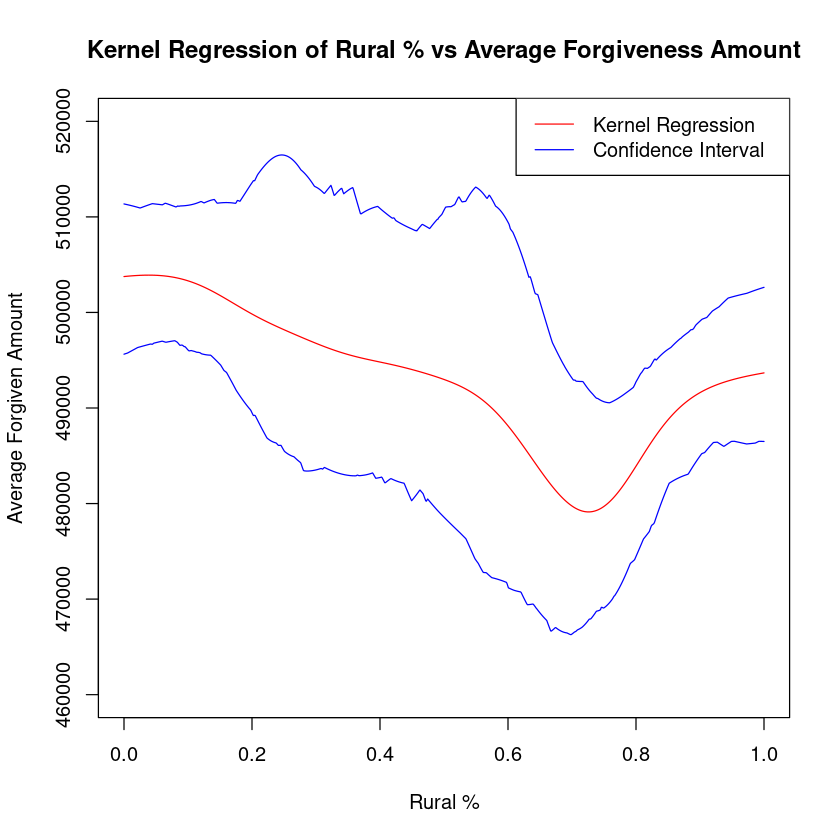

In [42]:
plot(c(min(x),max(x)),
c(4.6e5, 5.2e5),
type = 'n',
xlab = 'Rural %',
ylab = 'Average Forgiven Amount')
lines(seq(min(x),max(x),length.out = 1000),
z$est,
col = 'red')
lines(seq(min(x),max(x),length.out = 1000),
z$conf_ints[,1],
col = 'blue')
lines(seq(min(x),max(x),length.out = 1000),
z$conf_ints[,2],
col = 'blue')
title("Kernel Regression of Rural % vs Average Forgiveness Amount")
legend("topright",legend = c("Kernel Regression", "Confidence Interval"),
col = c("red","blue"), lty = c(1,1))

In [62]:
unr <- read.csv("./unemployment_clean.csv", header = T)%>%
filter(!(is.na(X2019_q234.q1) | is.na(X2020_q234.q1) | is.na(X2021_q234.q1)))

In [63]:
unr_change2020[is.na(unr_change2020)]

[1] NA

In [64]:
unr_change2019 <- unr$`X2019_q234.q1`
unr_change2020 <- unr$`X2020_q234.q1`
unr_change2021 <- unr$`X2021_q234.q1`

m <- 1000

est2019 <- kde(unr_change2019, m)
est2020 <- kde(unr_change2020, m)
est2021 <- kde(unr_change2021,m)

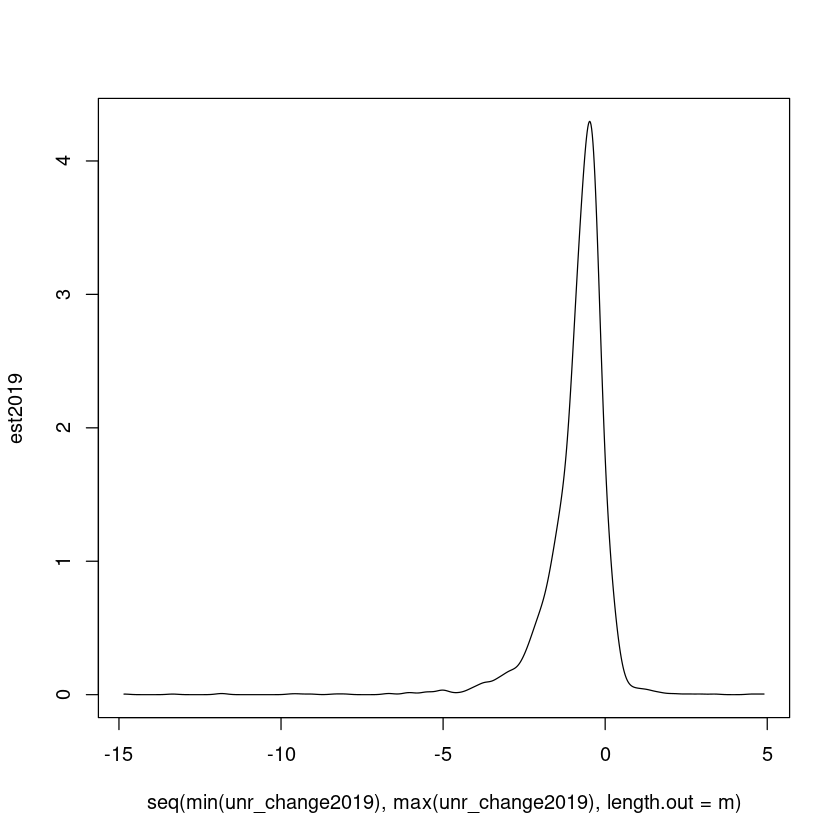

In [65]:
plot(seq(min(unr_change2019),max(unr_change2019),length.out=m),
est2019,
type='l')

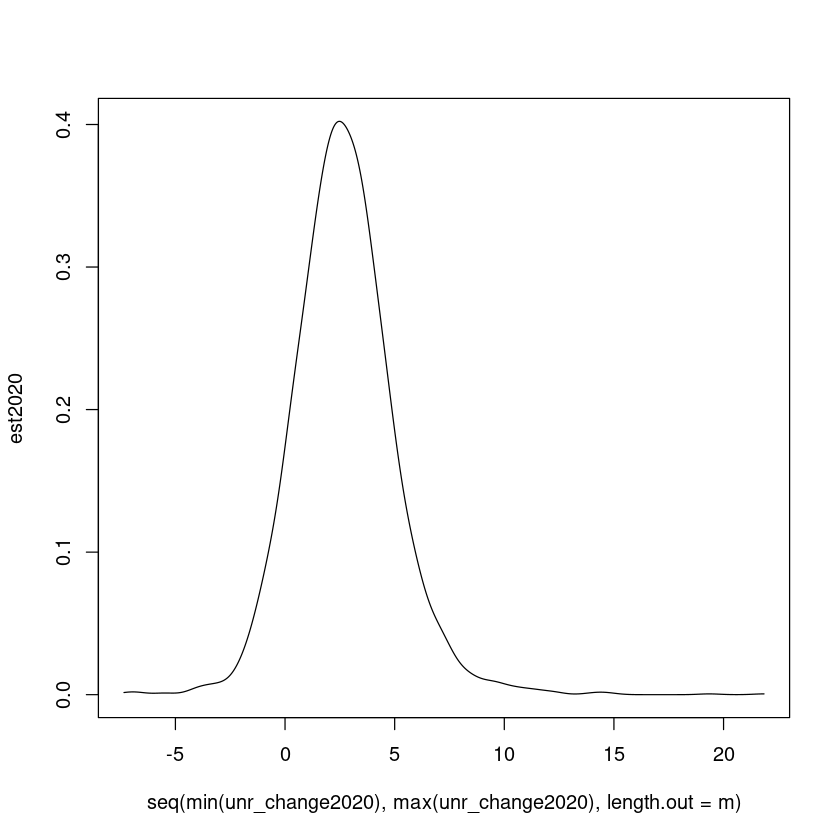

In [67]:
plot(seq(min(unr_change2020),max(unr_change2020),length.out=m),
est2020,
type='l')

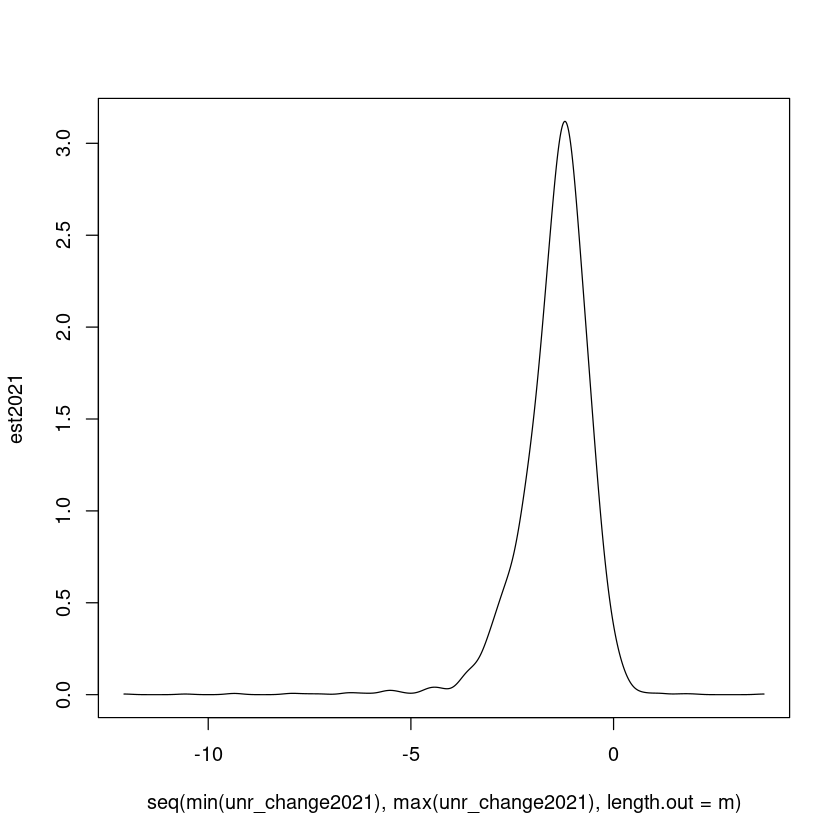

In [68]:
plot(seq(min(unr_change2021),max(unr_change2021),length.out=m),
est2021,
type='l')

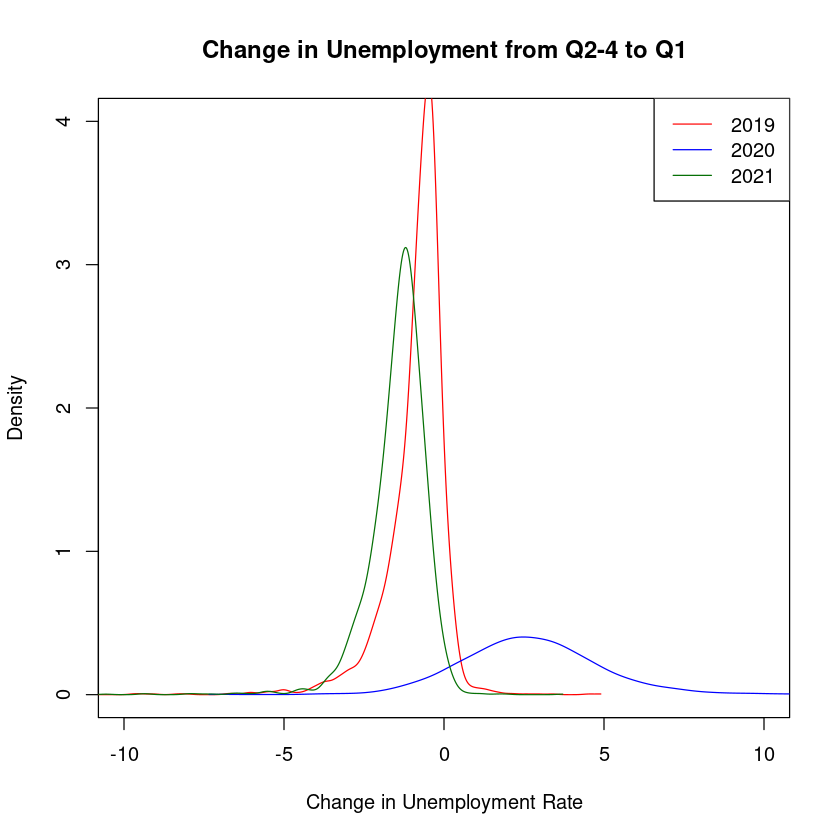

In [77]:
plot(c(-10,10),c(0,4),
type = 'n',
xlab = 'Change in Unemployment Rate',
ylab = 'Density')
lines(seq(min(unr_change2019),max(unr_change2019),length.out=m),
est2019,
col = 'red')
lines(seq(min(unr_change2020),max(unr_change2020),length.out=m),
est2020,
col = 'blue')
lines(seq(min(unr_change2021),max(unr_change2021),length.out=m),
est2021,
col = '#067006')
legend("topright", legend = c("2019","2020","2021"),
col = c("red","blue","#067006"),
lty = c(1,1,1))
title("Change in Unemployment from Q2-4 to Q1")

In [172]:
mapping <- read.csv("./mapping_data.csv", header = T) %>%
filter(!(BorrowerState %in% c('HI','PR','AK','AS','GU','VI'))) %>%
dplyr::select(lat,long)

In [112]:
system("R CMD SHLIB ./C_files/kde2d.c")

dyn.load("./C_files/kde2d.so")

kde2d <- function(x,y,m){

    x <- as.double(x)
    y <- as.double(y)

    n <- as.integer(length(x))
    m <- as.integer(m)

    g_x <- seq(min(x),max(x),length.out = m)
    g_y <- seq(min(y),max(y),length.out = m)

    bw <- sqrt(.25*(1.06 * min(sd(x),IQR(x)) * n^(-1/5))^2 +
             .25*(1.06 * min(sd(y),IQR(y)) * n^(-1/5))^2) %>%
             as.double()

    res <- double(m)

    a <- .C("kde2d",x=x,y=y,n=n,m=m,g_x=g_x,g_y=g_y,bw=bw,res=res)

    return(a)

}

In [173]:
lat <- mapping$lat
long <- -1 * abs(mapping$long)

xy <- as.points(long,lat)

m <- 1000

k <- MASS::kde2d(long, lat, n = m)

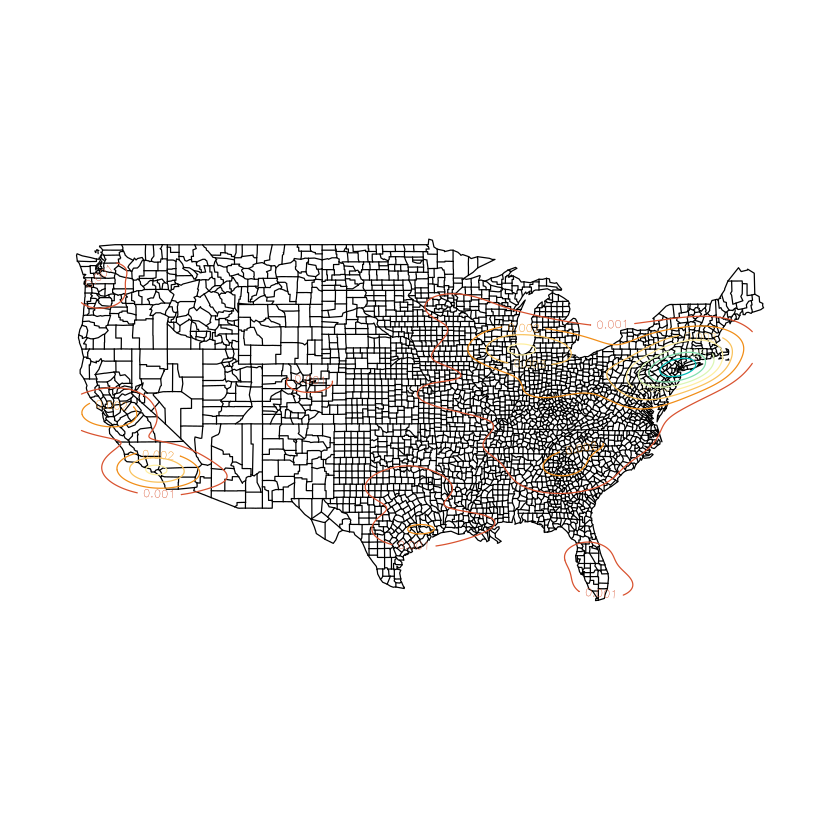

In [176]:
map('county','.')
contour(k, add = T, col = hcl.colors(10,'spectral'))

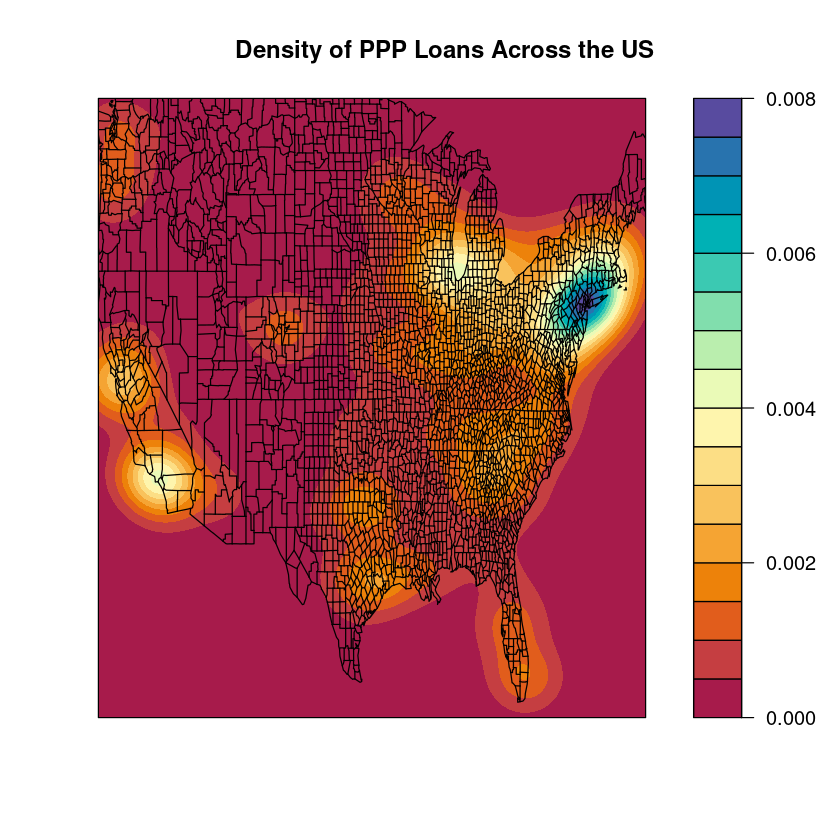

In [184]:
filled.contour(k,
plot.axes = {
    map('county','.', add=T)
},
col = hcl.colors(16,'spectral'))
title("Density of PPP Loans Across the US")

**MODEL**

$$(\Delta UNR)_{2021} = \beta_0 + \beta_1 FA + \beta_2 (\Delta UNR)_{2019} + \beta_3 RP + \beta_4 C_{2020}$$

In [4]:
county_data <- read.csv("./county_level_data.csv")
unr <- read.csv("./unemployment_clean.csv", header = T)%>%
filter(!(is.na(X2019_q234.q1) | is.na(X2020_q234.q1) | is.na(X2021_q234.q1)))
covid <- read.csv("covid_by_county.csv", header = T)

In [5]:
county_data <- county_data %>%
merge(covid, by.x = 'BorrowerFIPS', by.y = 'fips') %>%
merge(unr, by = 'BorrowerFIPS') %>%
dplyr::select(-c('X'))

In [6]:
county_data <- county_data %>%
mutate(Total_loan_bil = CurrentApprovalAmount_sum / 1e9,
Forgiven_loan_bil = ForgivenessAmount_sum / 1e9,
Rural_loan_pct = rural_pct,
Total_case = cases,
Total_death = deaths) %>%
dplyr::select(-c("CurrentApprovalAmount_sum",'ForgivenessAmount_sum',
"rural_pct",'cases','deaths'))

In [7]:
county_data %>% write.csv("county_data_final.csv")

Model 1: Total Loan Amount + Rural Percentage + Covid Case

In [8]:
model1 <- lm(X2020_q234.q1 ~ Total_loan_bil + Rural_loan_pct + Total_case, data = county_data)

summary(model1)


Call:
lm(formula = X2020_q234.q1 ~ Total_loan_bil + Rural_loan_pct + 
    Total_case, data = county_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.7765 -1.2578 -0.0462  1.1602 10.7584 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     3.757e+00  8.256e-02  45.501  < 2e-16 ***
Total_loan_bil  4.620e-01  1.253e-01   3.686 0.000232 ***
Rural_loan_pct -1.667e+00  9.981e-02 -16.703  < 2e-16 ***
Total_case      5.543e-08  4.310e-08   1.286 0.198574    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.003 on 3085 degrees of freedom
Multiple R-squared:  0.1685,	Adjusted R-squared:  0.1677 
F-statistic: 208.4 on 3 and 3085 DF,  p-value: < 2.2e-16


Model 2: Forgiven Loan Amount + Rural Percentage + Covid Case

In [9]:
model2 <- lm(X2020_q234.q1 ~ Forgiven_loan_bil + Rural_loan_pct + Total_case, data = county_data)

summary(model2)


Call:
lm(formula = X2020_q234.q1 ~ Forgiven_loan_bil + Rural_loan_pct + 
    Total_case, data = county_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.7772 -1.2604 -0.0435  1.1574 10.7547 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        3.747e+00  8.291e-02  45.194  < 2e-16 ***
Forgiven_loan_bil  5.036e-01  1.304e-01   3.863 0.000114 ***
Rural_loan_pct    -1.658e+00  1.001e-01 -16.569  < 2e-16 ***
Total_case         5.241e-08  4.222e-08   1.241 0.214558    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.002 on 3085 degrees of freedom
Multiple R-squared:  0.1689,	Adjusted R-squared:  0.1681 
F-statistic: 208.9 on 3 and 3085 DF,  p-value: < 2.2e-16


Model 3: Total Loan Amount + Rural Percentage + Covid Case + 2019 Change UNR

In [10]:
model3 <- lm(X2020_q234.q1 ~ Total_loan_bil + Rural_loan_pct + Total_case + X2019_q234.q1, data = county_data)

summary(model3)


Call:
lm(formula = X2020_q234.q1 ~ Total_loan_bil + Rural_loan_pct + 
    Total_case + X2019_q234.q1, data = county_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.0077 -1.2266 -0.1101  1.0704 11.0971 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     4.062e+00  8.428e-02  48.198  < 2e-16 ***
Total_loan_bil  4.702e-01  1.223e-01   3.844 0.000124 ***
Rural_loan_pct -1.534e+00  9.802e-02 -15.646  < 2e-16 ***
Total_case      4.484e-08  4.208e-08   1.065 0.286771    
X2019_q234.q1   4.623e-01  3.731e-02  12.391  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.955 on 3084 degrees of freedom
Multiple R-squared:  0.2079,	Adjusted R-squared:  0.2069 
F-statistic: 202.4 on 4 and 3084 DF,  p-value: < 2.2e-16


Model 4: Forgiven Loan Amount + Rural Percentage + Covid Case + 2019 Change UNR

In [11]:
model4 <- lm(X2020_q234.q1 ~ Forgiven_loan_bil + Rural_loan_pct + Total_case + X2019_q234.q1, data = county_data)

summary(model4)


Call:
lm(formula = X2020_q234.q1 ~ Forgiven_loan_bil + Rural_loan_pct + 
    Total_case + X2019_q234.q1, data = county_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.0080 -1.2334 -0.1102  1.0709 11.0934 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        4.053e+00  8.461e-02  47.900  < 2e-16 ***
Forgiven_loan_bil  5.114e-01  1.272e-01   4.019 5.99e-05 ***
Rural_loan_pct    -1.525e+00  9.827e-02 -15.514  < 2e-16 ***
Total_case         4.211e-08  4.122e-08   1.022    0.307    
X2019_q234.q1      4.623e-01  3.730e-02  12.392  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.955 on 3084 degrees of freedom
Multiple R-squared:  0.2083,	Adjusted R-squared:  0.2073 
F-statistic: 202.9 on 4 and 3084 DF,  p-value: < 2.2e-16


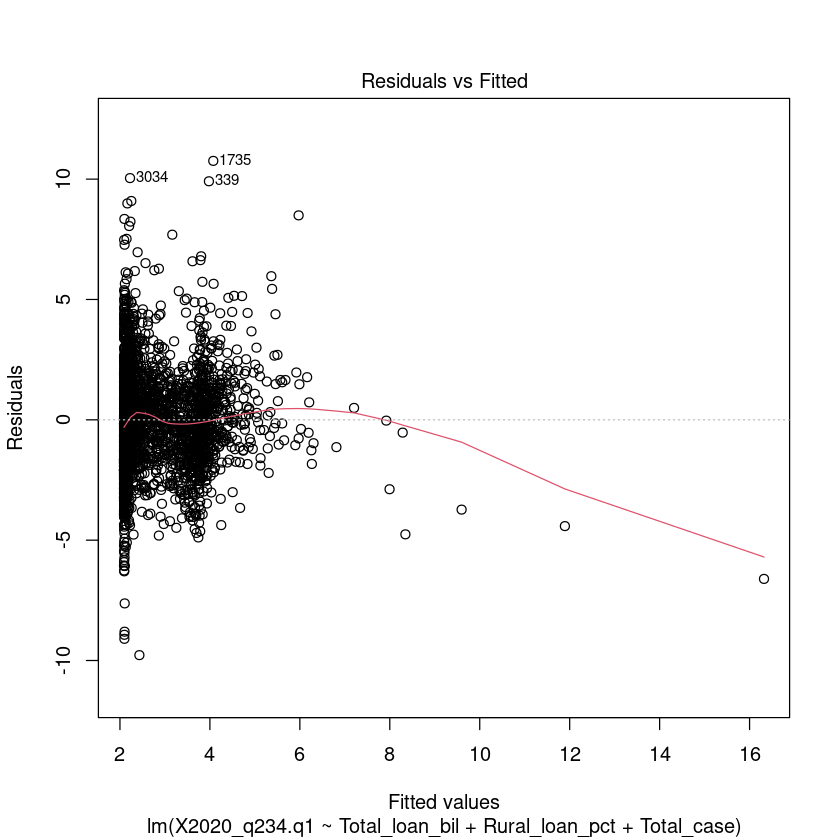

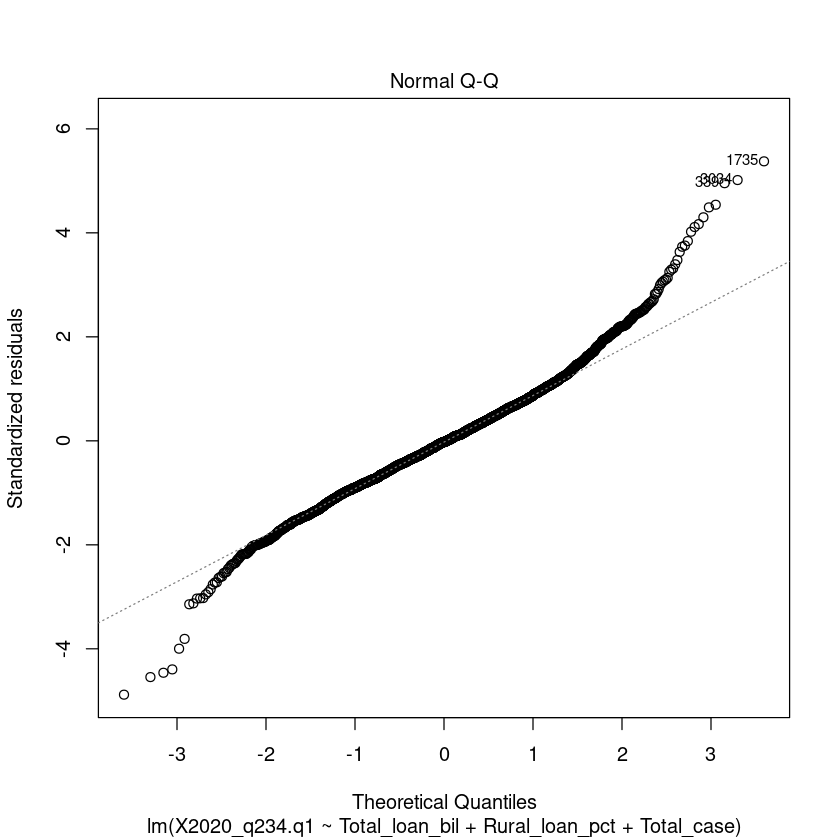

In [12]:
plot(model1, 1:2)

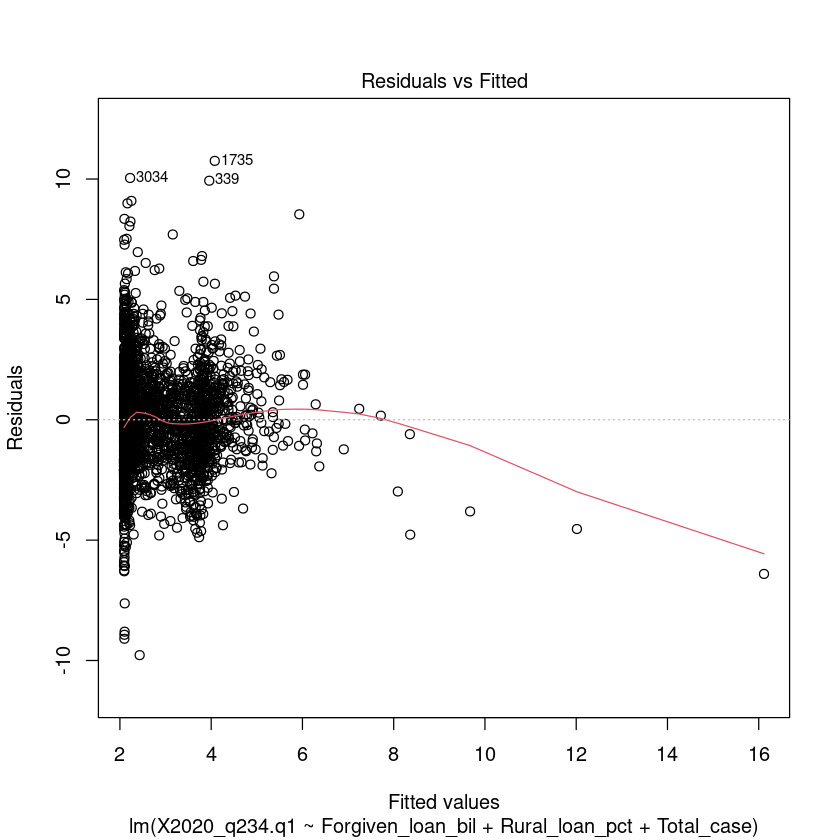

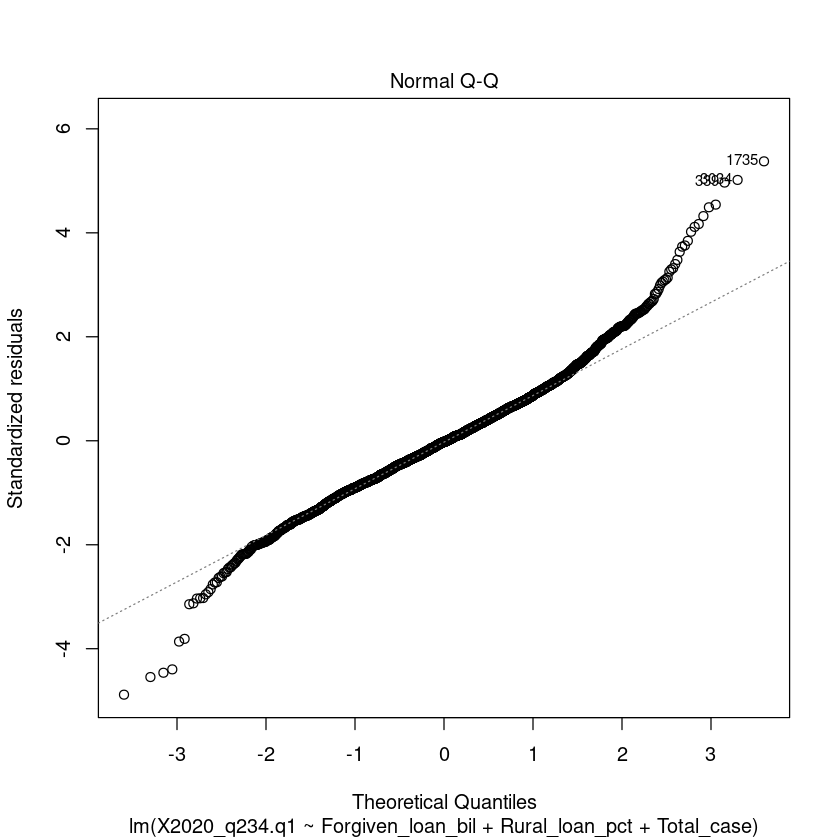

In [13]:
plot(model2, 1:2)

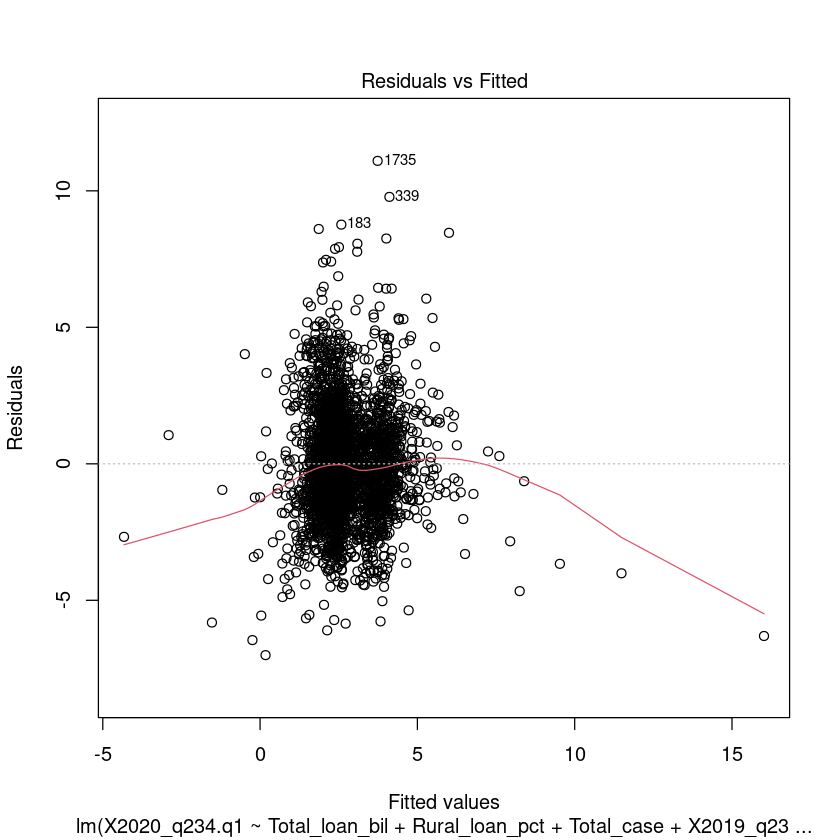

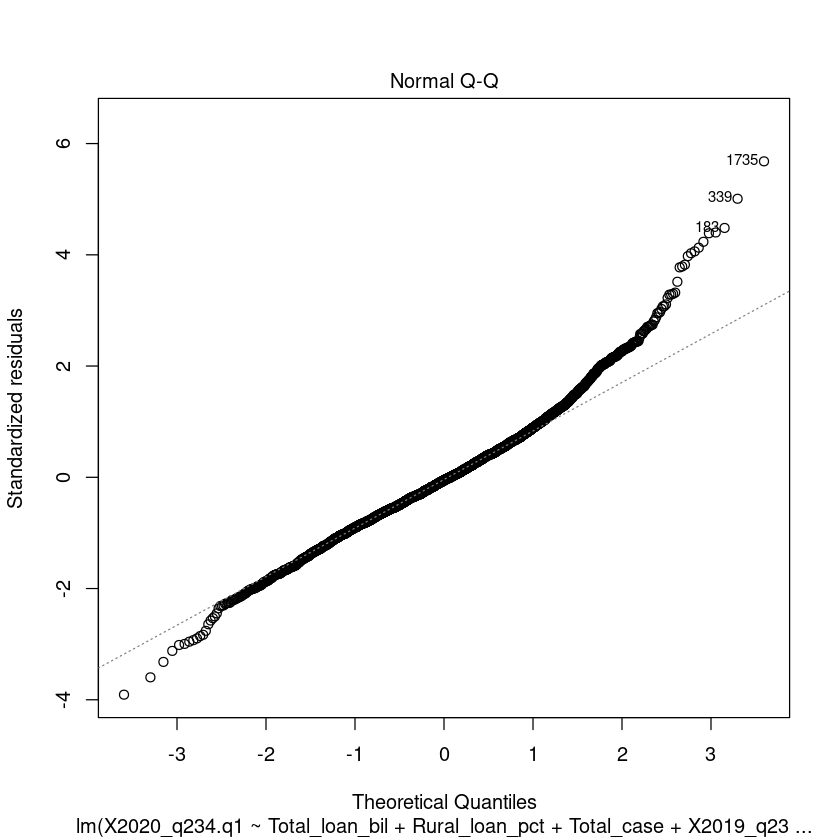

In [14]:
plot(model3, 1:2)

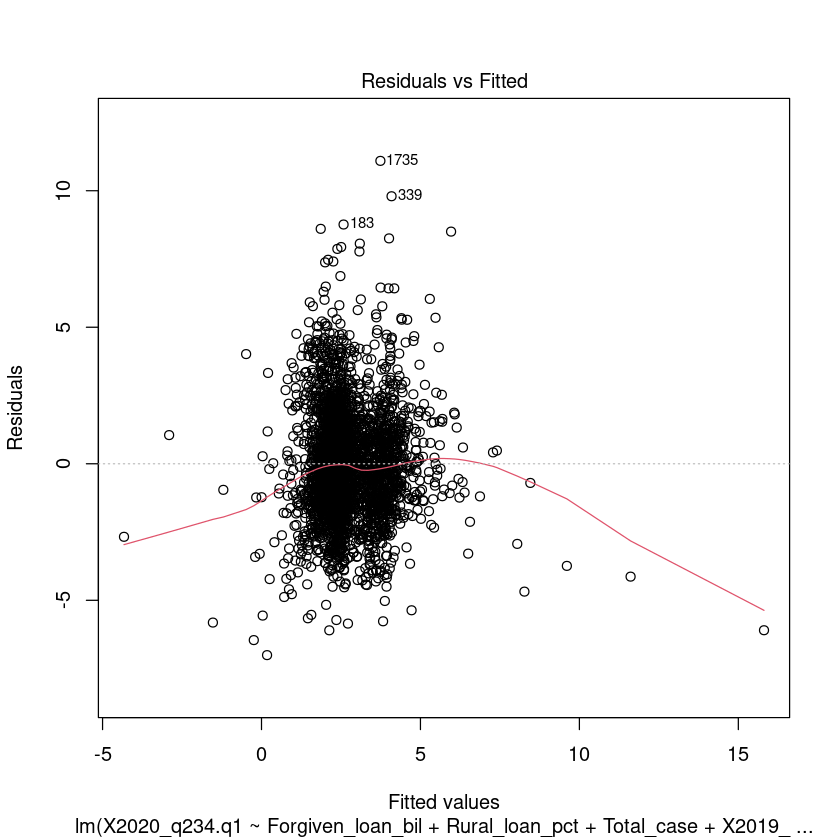

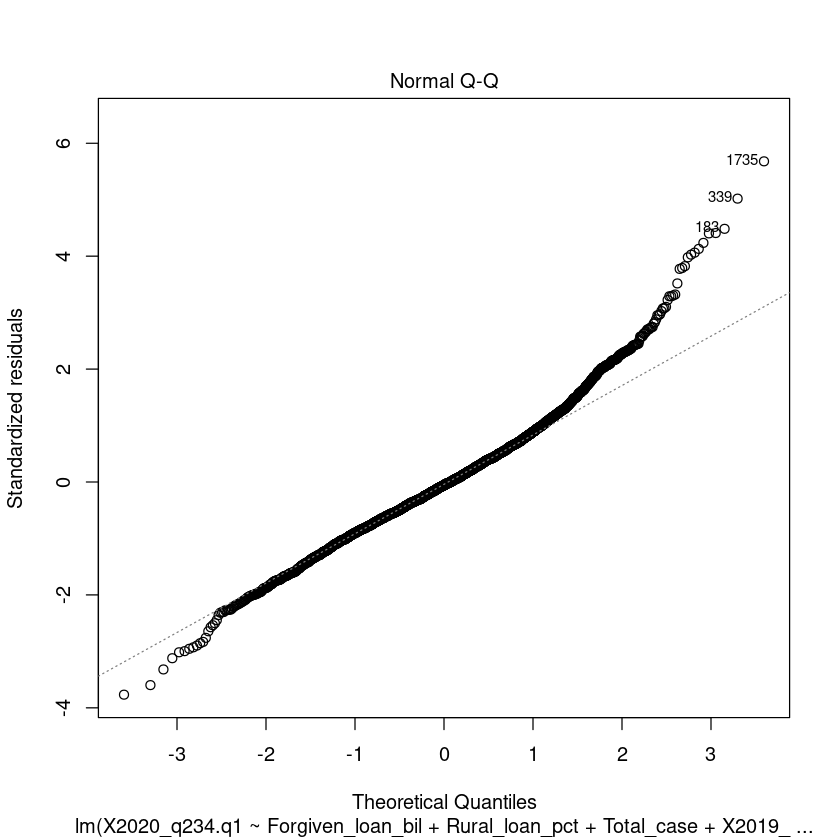

In [15]:
plot(model4, 1:2)


Call:
lm(formula = y_trans(X2020_q234.q1) ~ Forgiven_loan_bil + Rural_loan_pct + 
    Total_case + y_trans(X2019_q234.q1), data = county_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2051 -0.1839 -0.0041  0.1784  1.4032 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             9.141e-01  1.470e-01   6.220 5.63e-10 ***
Forgiven_loan_bil       7.861e-02  2.042e-02   3.850  0.00012 ***
Rural_loan_pct         -2.405e-01  1.575e-02 -15.269  < 2e-16 ***
Total_case              4.318e-09  6.613e-09   0.653  0.51384    
y_trans(X2019_q234.q1)  6.389e-01  3.888e-02  16.433  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3136 on 3084 degrees of freedom
Multiple R-squared:  0.2236,	Adjusted R-squared:  0.2226 
F-statistic: 222.1 on 4 and 3084 DF,  p-value: < 2.2e-16


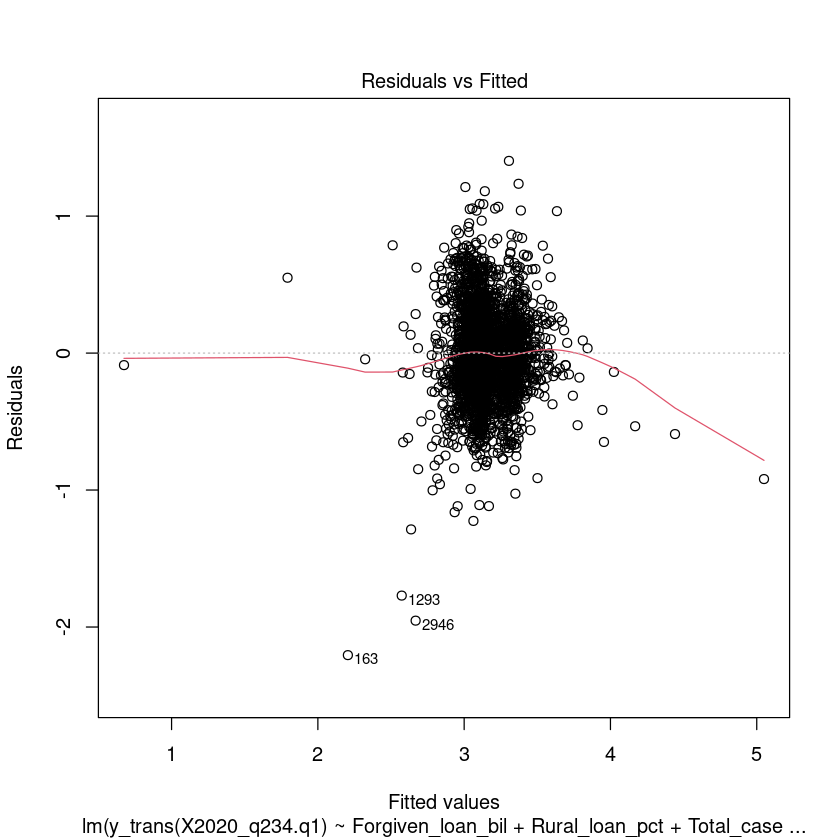

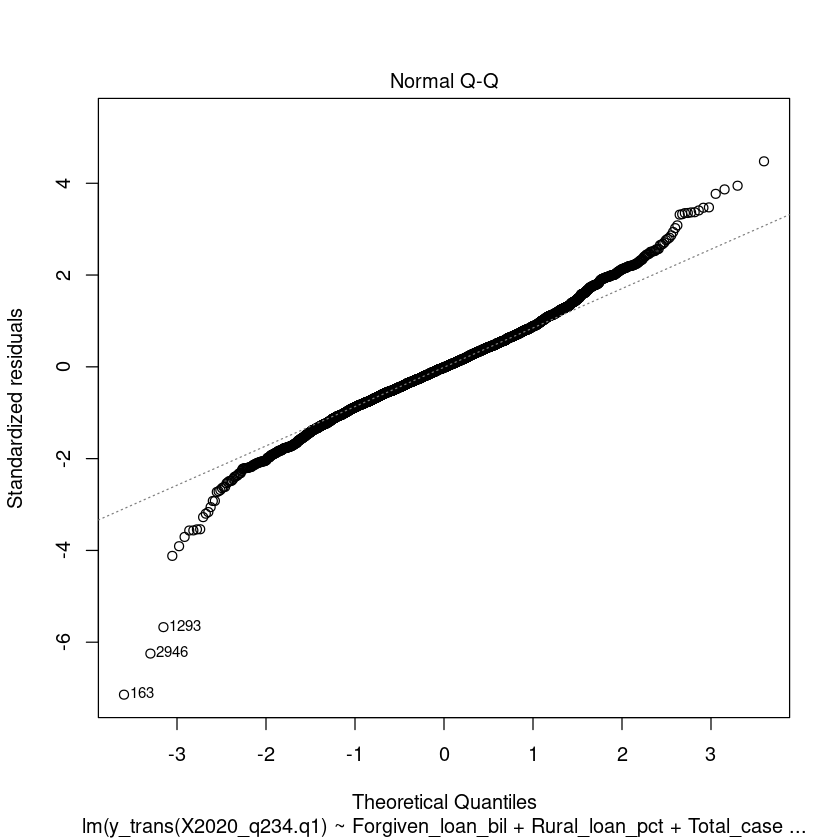

In [30]:
y_trans <- function(x) sqrt(x + (abs(min(x))))

model5 <- lm(y_trans(X2020_q234.q1) ~ Forgiven_loan_bil + Rural_loan_pct + Total_case + y_trans(X2019_q234.q1), data = county_data)

summary(model5)

plot(model5, 1:2)


Call:
lm(formula = y_trans(X2020_q234.q1) ~ Forgiven_loan_bil + Rural_loan_pct + 
    Total_death + y_trans(X2019_q234.q1), data = county_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.20435 -0.18225 -0.00179  0.17911  1.38219 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             9.198e-01  1.464e-01   6.285 3.75e-10 ***
Forgiven_loan_bil       2.723e-02  1.560e-02   1.745   0.0811 .  
Rural_loan_pct         -2.403e-01  1.569e-02 -15.319  < 2e-16 ***
Total_death             9.122e-07  1.816e-07   5.025 5.33e-07 ***
y_trans(X2019_q234.q1)  6.375e-01  3.872e-02  16.463  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3123 on 3084 degrees of freedom
Multiple R-squared:  0.2298,	Adjusted R-squared:  0.2288 
F-statistic: 230.1 on 4 and 3084 DF,  p-value: < 2.2e-16


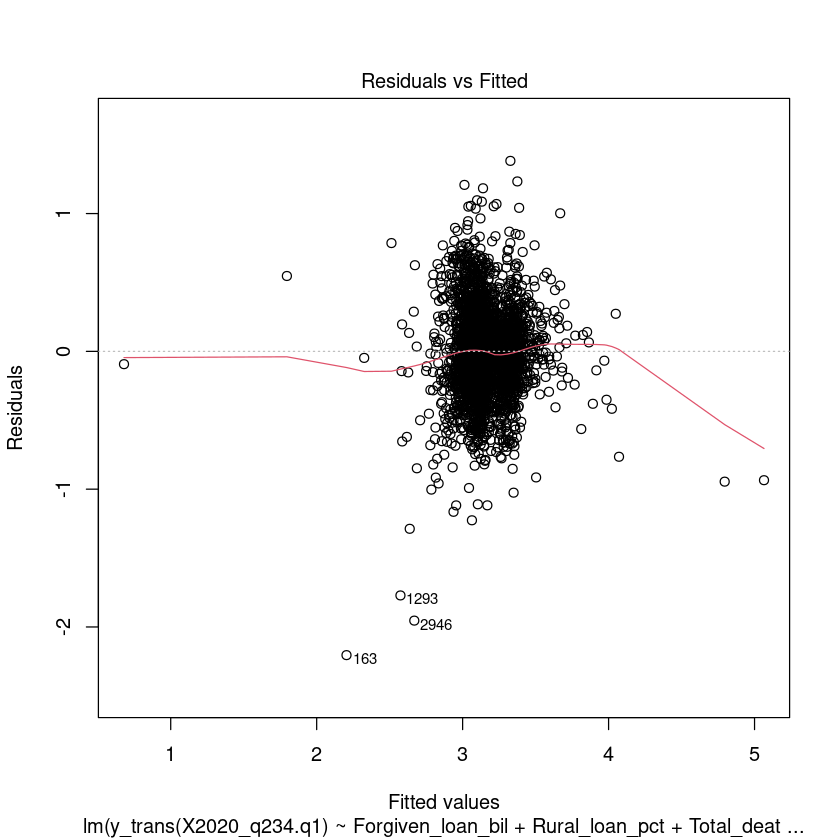

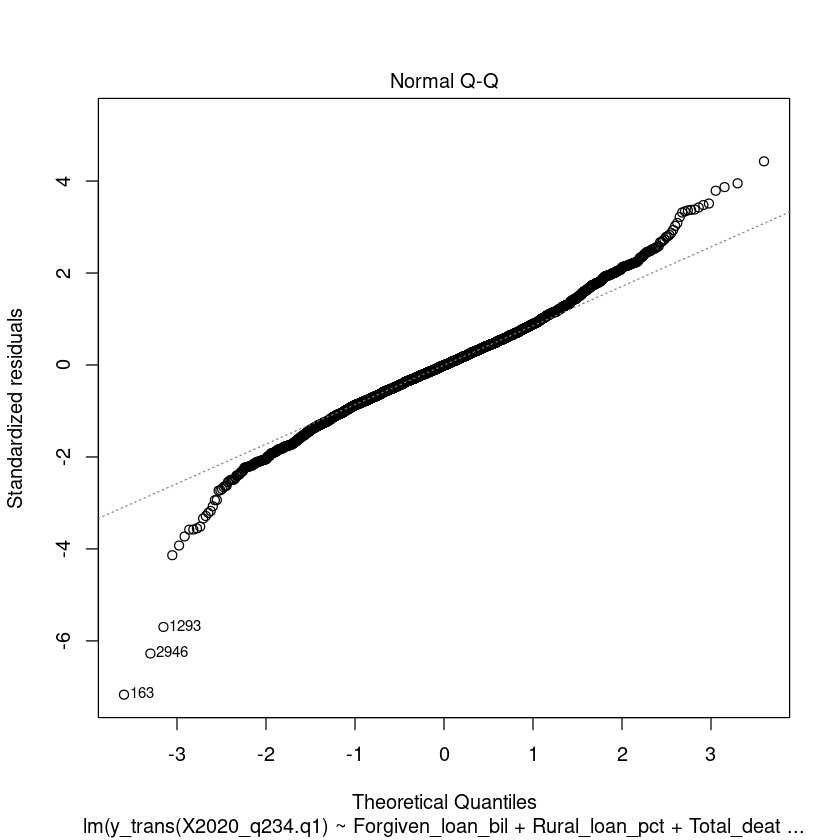

In [31]:
model6 <- lm(y_trans(X2020_q234.q1) ~ Forgiven_loan_bil + Rural_loan_pct + Total_death + y_trans(X2019_q234.q1), data = county_data)

summary(model6)

plot(model6, 1:2)